# Tarea Semana 16
## Optimización por sistemas de hormigas (SH)

### Javier Fernández y Kaled Sequeira

- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para el trabajo en clase TS16.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.
- **Valor total 14 puntos**.
- Fecha de entrega: **Viernes 09 de junio, 11.59 pm**.

Los algoritmos de optimización por colonias de hormigas son muy adecuados para resolver problemas de rutas más cortas. La implementación que se le describirá funciona para resolver en problema del vendedor ambulante. El problema del vendedor ambulante es un problema típico de optimización que tiene muchas aplicaciones en distintas áreas, el problema se refiere a buscar la ruta más cortas entre un conjunto de ciudades.

Resuelva el problema del vendedor ambulante para un sistema de ciudades con coordenadas

$$
x_i = 0.1\Big[(9 + 11i^2)~\text{mod}~200 \Big]\\
y_i = 0.1\Big[(7 + 1723i)~\text{mod}~200 \Big]
$$

1. Escriba una función que calcule la probabilidad de ir de una ciudad a otra ciudad disponible (que no se ha visitado antes). Esta función recibe como entradas la lista tabú (lista de ciudades visitadas), la matriz $\tau_{ij}$, la matriz de visibilidad (matriz de distancias entre ciudades), los parámetros $\alpha$ y $\beta$, y los índices _i_ de la ciudad actual y _j_ de la ciudad para la que se quiere calcular la probabilidad. La probabilidad de ir de _i_ a _j_ se calcula como

$$
p_{ij} = \dfrac{\tau_{ij}^{\alpha}\eta_{ij}^{\beta}}{\sum_{v_l \notin L_T}\tau_{lj}^{\alpha}\eta_{lj}^{\beta}}
$$

la sumatoria en el denominador itera sobre todas las ciudades $v_l$ que **no** están en la lista tabú $L_T$. **Valor: 2 puntos.**

In [8]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Obtener probabilidad para ir de i a j

def calcular_probabilidad (ciudadesVisitadas, tau, eta, alpha, beta, i, j):
    denominador = 0     # Se inicializa el valor del denominador para simplificar el cálculo
    
    for l in range(len(distancias[0])):
        if l not in ciudadesVisitadas:
            denominador += tau[l][j]**alpha * eta[l][j]**beta   # Se calcula el valor del denominador

    return (tau[i][j]**alpha * eta[i][j]**beta) / denominador  # Se calcula la fracción y se retorna su valor

2. La función anterior se usa para crear lista con las probabilidades de ir de la ciudad _i_ a todas las ciudades _j_ disponibles. La lista tiene la forma `lista_probabilidades[[indice_ciudad_X, probabilidad], [indice_ciudad_Y, probabilidad], ...]`. Ahora use esta lista como entrada de una función resulta en el índice de la próxima ciudad a visitar. **Valor: 2 puntos.**
    * Debe ordenar la lista de mayor a menor probabilidad de visita. 
    * Compare un número aleatorio de _0_ a _1_ con la probalidad asociada a cada ciudad, si el número aleatorio es menor que la probabilidad se selecciona la ciudad como la próxima a visitar. 
    * Si no se selecciona ninguna ciudad, se escoge la que tiene la menor probabilidad de ser visitada. 

In [10]:
# Obtener nueva ciudad
def obtener_nueva_ciudad(lista_probabilidades):
    
    lista_probabilidades.sort()   # Se ordena de menor a mayor
    lista_probabilidades = lista_probabilidades[::-1]  # Se invierte el orden de mayor a menor

    prob = np.random.random()    # se toma el valor de probabilidad a comparar

    for ciudad in lista_probabilidades:
        if ciudad[1] >= prob:    # Comparación
            return ciudad[0]     # Retorno correcto
    
    return lista_probabilidades[-1][0]    # Retorno del caso que no sea menor a ninguno

3. Use las funciones escritas en los puntos anteriores así como en el trabajo en clase 08 para formar el algoritmo de optimización por sistemas de hormigas. El algoritmo tiene la siguiente forma: **Valor: 6 puntos.**

### Algoritmo de Sistema de hormigas
1. Inicialice los niveles de feromonas
2. Para cada hormiga $k$, seleccione un punto de partida **aleatorio** y agreguelo a la lista tabú $L_T$. A continuación construya su trayecto $S$. Para cada paso de $S$ seleccione el movimiento (camino) de un nodo $j$ a uno $i$ con probabilidad $p(e_{ij}|S)$, dada por
$$
    p(c_{ij}|S) = \dfrac{\tau_{ij}^{\alpha}\eta_{ij}^{\beta}}{\sum_{v_l \notin L_T}\tau_{lj}^{\alpha}\eta_{lj}^{\beta}}
$$
En el paso final retorne al nodo origen. Calcule la distancia $D_k$ del trayecto.

3. Actualice los niveles de feromonas:

    3.1. Para cada hormiga $k$, determine $\Delta\tau_{ij}^{[k]}$ como: $$ \Delta\tau_{ij}^{[k]} = \begin{cases}
                                        \dfrac{1}{D_k} & \text{si la hormiga k cruzó el camino}~c_{ij}\\
                                        0 & \text{si no.}\end{cases}$$
    
    3.2. Sume los $\Delta\tau_{ij}^{[k]}$ para generar $\Delta\tau_{ij}$: $$\Delta\tau_{ij} = \sum_{k=1}^{N} \Delta\tau_{ij}^{[k]}$$

    3.3. Modifique $\tau_{ij}$: $$\tau_{ij} \leftarrow (1 - \rho)\tau_{ij} + \Delta\tau_{ij}$$
    
4. Repita los pasos 2 y 3 hasta encontrar una solución satisfactoria.

In [11]:
# Algoritmo sistema de hormigas

        ## Lista de coordenadas
coordenadas = [] 
N = 100


for i in range(N):   # Cálculo de las coordenadas de las ciudades
    x = 0.1*(( 9 + 11 * i**2) % 200)
    y = 0.1*((7 + 1723 * i) % 200)
    coordenadas.append([x,y])

coordenadas = np.asarray(coordenadas)   # Pasar a Array




        ## Distancia entre ciudades

def calcular_distancia(ciudad1, ciudad2):   # Función para el cálculo de la distancia entre 2 ciudades
    return np.sqrt( (ciudad2[0]-ciudad1[0])**2 + (ciudad2[1]-ciudad1[1])**2  )


distancias = np.zeros((N,N))  

for i in range(N):
    for j in range(i,N):
        distancias[i,j] = calcular_distancia(coordenadas[i],coordenadas[j])     # Cálculo de la distancia entre 2 ciudades
        distancias[j,i] = distancias[i,j]                                       # Matriz simétrica







        ## Inicialización de las feromonas

tau = np.zeros((N,N))

numCiudad = np.random.randint(0,N)   # Selección de primera ciudad, aleatoria
ciudadesVisitadas = [numCiudad]      # Inicialización de la lista tabú

D = 0                               # Inicialización de la distancia 


run = True
while run:
    ruta = distancias[numCiudad]    # Se toma las distancias de las otras ciudades desde la ciudad Actual
    indicesDistancias = []          # Se inicializa la variable que almacena indices de las ciudades y las distancias que representa
    
    
    for i in range(N):
        if i not in ciudadesVisitadas:  # Ignora las ciudades de la lista tabú
            indicesDistancias.append([i,ruta[i]])   # Llena los índices y las distancias
    

    indicesDistancias = np.asarray(indicesDistancias)

    indiceMinimo = np.argmin(indicesDistancias[:,1])    # Toma el índice de la distancia mínima
    numCiudad = int(indicesDistancias[indiceMinimo,0])  # Actualiza la ciudad

    D += indicesDistancias[indiceMinimo,1]              # Acumula la distancia


    ciudadesVisitadas.append(numCiudad)                 # Registra la ciudad en la lista tabú

    if len(ciudadesVisitadas)==N:                       #Termina cuando se alcanza el total
        run=False
        

tau[:]=D

4. Use el algoritmo para encontrar el camino más corto entre el sistema de ciudades indicado. Note que el punto de partida es aleatorio y el trayecto vuelve al punto inicial. Imprima la distancia mas corta obtenida. Utilice los siguientes parámetros para inicializar el algoritmo: **Valor: 2 puntos.**

In [12]:
# Parámetros del algoritmo

nHormigas = 20
alpha = 1.0
beta = 5.0
rho = 0.5



# Algoritmo
recorridosHormigas=[]                       # Inicializa lista para guardar las distancias de cada hormiga y sus recorridos de la forma: 
                                            # recorridosHormigas[numero de hormiga][ 0 = distancia recorrida , 1 = Lista tabú en el orden recorrido ]

# Cálculo del ETA

eta = []

for ruta in distancias:
    fila = []
    for dato in ruta:
        if dato == 0:       # Se toma eta como el recíproco de la distancia
            fila.append(0)
        else:
            fila.append(1/dato)
    eta.append(fila)


for k in range(nHormigas):
    numCiudad = np.random.randint(0,N)      # Selección de primera ciudad, aleatoria
    ciudadesVisitadas = [numCiudad]         # Inicialización de la lista tabú

    D = 0                                   # Inicialización de la distancia 

    # Paso 2
    run = True
    while run:
        ruta = distancias[numCiudad]        # Se toma las distancias de las otras ciudades desde la ciudad Actual
        
        lista_probabilidades = []          # Se inicializa la variable que almacena indices de las ciudades y las probabilidades de cruzarlas
    

        for j in range(N):
            if j not in ciudadesVisitadas:

                prob = calcular_probabilidad(ciudadesVisitadas, tau, eta, alpha, beta, numCiudad, j)  # Cálculo de la probabilidad
                
                lista_probabilidades.append([j,prob])  # Guardar ciudad y probabilidad en la lista de probabilidades
        

        numCiudad = obtener_nueva_ciudad(lista_probabilidades)  # Elegir la nueva ciudad

        D += ruta[numCiudad]    # Suma de la distancia recorrida

        ciudadesVisitadas.append(numCiudad)  # Registro de la ciudad visitada

        if len(ciudadesVisitadas)==N:
            ciudadesVisitadas.append(ciudadesVisitadas[0])  # Registro de vuelta 
            D += ruta[ciudadesVisitadas[0]]
            run=False

    # Se actualizan los niveles de las feromónas
    # Paso 3
    # 3.1 - Para cada hormiga k se determina el elemento tau de la matriz
    # Recorrer la lista ciudades_visitadas y asignar valor 1/D a los elementos correspondientes en la matriz
    n = len(ciudadesVisitadas)
    for i in range(n - 1):
        ciudad_actual = ciudadesVisitadas[i]
        siguiente_ciudad = ciudadesVisitadas[i + 1]
        tau[ciudad_actual - 1][siguiente_ciudad - 1] = 1/D

    # 3.2 - Se determina el tau total como la suma de los taus de la matriz de feromonas
    tau_total = sum(sum(fila) for fila in tau)

    # 3.3 - Se modifica la matriz tau al multiplicar por 1 - rho y mutiplicr por la suma es decir tau_total 
    rho = 0.5 # Valor hipotético para que no tire error la definición
    tau = [[(1-rho)*elemento - tau_total  for elemento in fila] for fila in tau]
    


    recorridosHormigas.append([D,ciudadesVisitadas])   # Registro de la distancia y recorrido de la hormiga
        


    
    

C:\Users\kaled\AppData\Local\Temp\ipykernel_13512\2973763730.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return (tau[i][j]**alpha * eta[i][j]**beta) / denominador  # Se calcula la fracción y se retorna su valor


5. Grafique el trayecto final encontrado. **Valor: 2 puntos.**

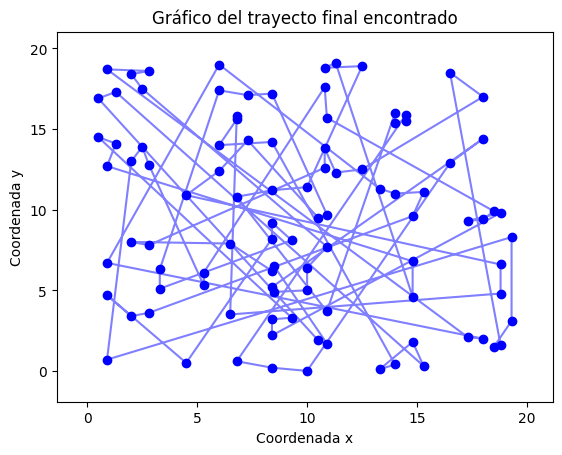

In [34]:
# Trayecto más corto
coordenadasEnRuta = []
for i in ciudadesVisitadas:
    coordenadasEnRuta.append(coordenadas[i]) 
coordenadasEnRuta = np.asarray(coordenadasEnRuta)


# Graficar los datos de dispersión (ciudades) y la línea (recorrido)
plt.plot(coordenadasEnRuta[:,0], coordenadasEnRuta[:,1],color = "blue",alpha =0.5)
plt.scatter(coordenadas[:,0], coordenadas[:,1],color = "blue")

# Agregar títulos
plt.title("Gráfico del trayecto final encontrado")
plt.xlabel("Coordenada x")
plt.ylabel("Coordenada y")

# Ajustar márgenes
plt.margins(x=0.1, y=0.1)
plt.show()

## Referencias
* M.Wahde (2008). _Biologically Inspired Optimization Methods: An Introduction_. WIT Press.